# Competição do Kaggle para previsão de receita de filmes

In [ ]:
#Bibliotecas para manipulação de dados e machine learning

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Analisar Investimento, Linguagem, Gênero, Popularidade.

In [51]:
#Importando datasets em variáveis

treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [52]:
#Visualização do treino

treino.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [53]:
#Descrição do treino

treino.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [54]:
#Visualização do teste

teste.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [55]:
#Limpando colunas que não serão usadas do treino e mudando o nome do resto

treino = treino.drop(columns=['homepage']) 
treino = treino.drop(columns=['imdb_id']) 
treino = treino.drop(columns=['overview']) 
treino = treino.drop(columns=['release_date']) 
treino = treino.drop(columns=['status']) 
treino = treino.drop(columns=['tagline']) 
treino = treino.drop(columns=['Keywords']) 
treino = treino.drop(columns=['cast'])
treino = treino.drop(columns=['crew']) 
treino = treino.drop(columns=['poster_path']) 
treino = treino.drop(columns=['production_countries']) 

treino = treino.rename(columns={'belongs_to_collection': 'Coleção','budget': 'Orçamento', 'genres': 'Gênero', 'original_language': 'Linguagem Original', 
                                'original_title': 'Titulo Original',  'popularity': 'Popularidade',  'production_companies': 'Produtora',  'runtime': 'Tempo',  'spoken_languages': 'Linguagem Falada',
                                'title': 'Titulo','revenue': 'Receita/Bilheteria'})

In [56]:
#Limpando colunas que não serão usadas do teste e mudando o nome do resto

teste = teste.drop(columns=['homepage']) 
teste = teste.drop(columns=['imdb_id']) 
teste = teste.drop(columns=['overview']) 
teste = teste.drop(columns=['release_date']) 
teste = teste.drop(columns=['status']) 
teste = teste.drop(columns=['tagline']) 
teste = teste.drop(columns=['Keywords']) 
teste = teste.drop(columns=['cast'])
teste = teste.drop(columns=['crew']) 
teste = teste.drop(columns=['poster_path']) 
teste = teste.drop(columns=['production_countries']) 

teste = teste.rename(columns={'belongs_to_collection': 'Coleção','budget': 'Orçamento', 'genres': 'Gênero', 'original_language': 'Linguagem Original', 
                                'original_title': 'Titulo Original',  'popularity': 'Popularidade',  'production_companies': 'Produtora',  'runtime': 'Tempo',  'spoken_languages': 'Linguagem Falada',
                                'title': 'Titulo'})

,id,Coleção,Orçamento,Gênero,Linguagem Original,Titulo Original,Popularidade,Produtora,Tempo,Linguagem Falada,Titulo
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,ディアルガVSパルキアVSダークライ,3.851534,NaN,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pokémon: The Rise of Darkrai
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,Attack of the 50 Foot Woman,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Attack of the 50 Foot Woman
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,Addicted to Love,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Addicted to Love
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,Incendies,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...",130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Incendies
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,Inside Deep Throat,3.217680,NaN,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Inside Deep Throat


In [57]:
#Transformando o treino em uma tabela com apenas os números

treino_num = treino.select_dtypes(['int','float'])
treino_num.head()

,id,Orçamento,Popularidade,Tempo,Receita/Bilheteria
0,1,14000000,6.575393,93.0,12314651
1,2,40000000,8.248895,113.0,95149435
2,3,3300000,64.299990,105.0,13092000
3,4,1200000,3.174936,122.0,16000000
4,5,0,1.148070,118.0,3923970


In [58]:
#Transformando o teste em uma tabela com apenas os números

teste_num = teste.select_dtypes(['int','float'])
teste_num.head()

,id,Orçamento,Popularidade,Tempo
0,3001,0,3.851534,90.0
1,3002,88000,3.559789,65.0
2,3003,0,8.085194,100.0
3,3004,6800000,8.596012,130.0
4,3005,2000000,3.217680,92.0


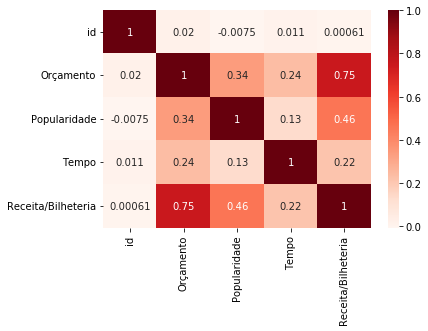

In [59]:
#Revenue = Receita de bilheteria // Exatamente o que precisamos prever no trabalho
#Usando gráfico do seaborn para visualizar a correlação dos dados de treino, notando que budget(orçamento dos filmes) influencia mais no revenue

sns.heatmap(treino_num.corr(), cmap='Reds', annot=True)

In [60]:
for i, e in enumerate(treino['Gênero'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
